# USING PERCEPTRON METHOD

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

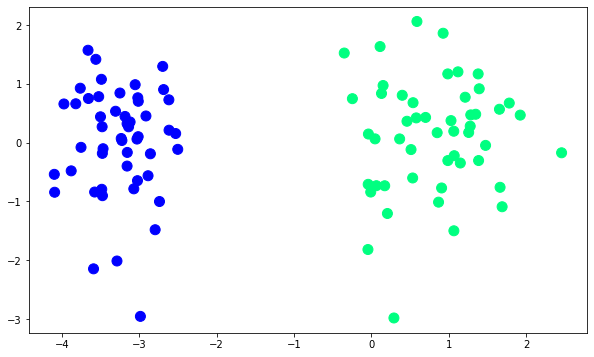

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [4]:
def step(z):
    return 1 if z>0 else 0


def Perceptron(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr=0.1
    
    for i in range(1000):
        j = np.random.randint(0,x.shape[0])
        y_hat = step(np.dot(x[j],weights))
        weights = weights +lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [5]:
intercept_,coef_ = Perceptron(x,y)
print(intercept_)
print(coef_)

1.3000000000000003
[1.05343617 0.2221512 ]


In [6]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [7]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

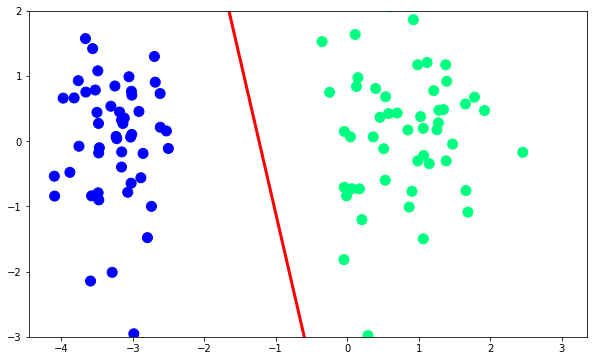

In [8]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# USING SIGMOID FUNCTION INSTEAD OF STEP

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))


def Perceptron_2(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr=0.1
    
    for i in range(1000):
        j = np.random.randint(0,x.shape[0])
        y_hat = sigmoid(np.dot(x[j],weights))
        weights = weights +lr*(y[j]-y_hat)*x[j]
        
    return weights[0],weights[1:]

In [10]:
intercept_,coef_ = Perceptron_2(x,y)
print(intercept_)
print(coef_)

2.7696767823510986
[2.86842477 0.13672265]


In [11]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [12]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

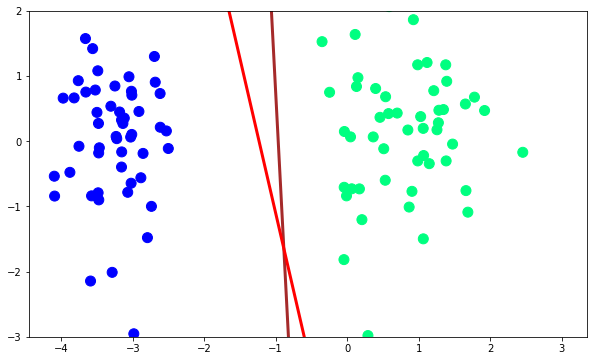

In [13]:
plt.figure(figsize=(10,6))
plt.plot(x_input1,y_input1,color='brown',linewidth=3)
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# USING SKLEARN MODEL LOGISTIC REG

In [14]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none',solver='sag')
lor.fit(x,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty='none', solver='sag')

In [15]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [16]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

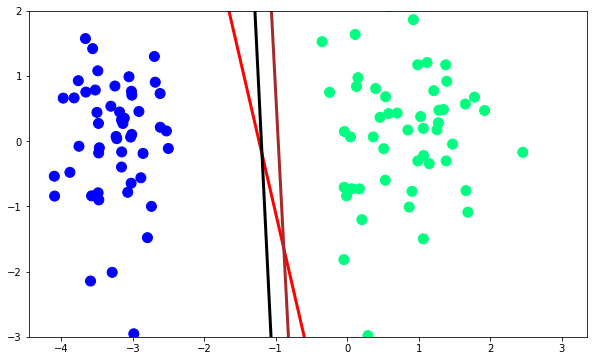

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='brown',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

#  USING GREDIANT DESCENT METHOD

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def LogisticGD(x,y):
    x = np.insert(x,0,1,axis=1)
    weights = np.ones(x.shape[1])
    lr = 0.5
    
    for i in range(2500):
        y_hat = sigmoid(np.dot(x,weights))
        weights = weights +lr*(np.dot((y-y_hat),x)/x.shape[0])
        
    return weights[0],weights[1:]

In [19]:
intercept_,coef_ = LogisticGD(x,y)
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [20]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input + b

(-3.0, 2.0)

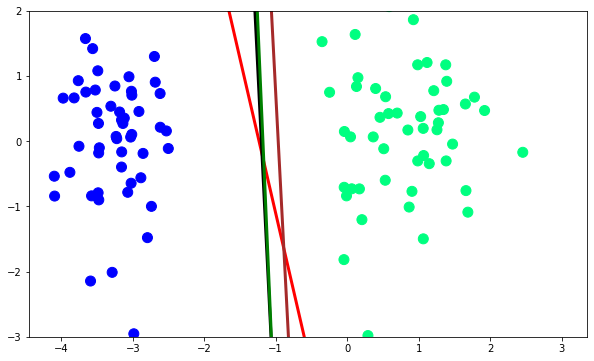

In [21]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='brown',linewidth=3)
plt.plot(x_input2,y_input2,color='black',linewidth=3)
plt.plot(x_input3,y_input3,color='green',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# SOFTMAX REGRESSION FOR MULTI CLASS PROBLEM

In [22]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
df=sns.load_dataset('iris')

In [24]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
df = df[['sepal_length','petal_length','species']]

In [28]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [29]:
x = df.iloc[:,:2]
y = df.iloc[:,-1]

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [32]:
y_pred = clf.predict(x_test)

In [33]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [34]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


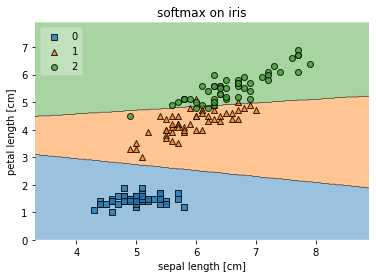

In [35]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(x.values,y.values,clf,legend=2)

# adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('softmax on iris')
plt.show()